In [64]:
import os
print(os.getcwd())

/Users/lakshaykapur/Developer/ADS/MERA_Analysis/DMAT


In [65]:
import numpy as np
import pandas as pd

In [66]:
file_path = '/Users/lakshaykapur/Developer/DMAT/MERA_Analysis/DMAT/dly532.csv'
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
        #print(data)
else:
    print(f"File not found: {file_path}")

In [67]:
df = pd.read_csv(file_path, delimiter=',')
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.head()

,date,ind,maxtp,ind,mintp,igmin,gmin,ind,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


In [68]:
print(df.shape) #rows & cols
print(df.dtypes) #datatype of each var

(30255, 26)
0
date      object
ind       object
maxtp     object
ind       object
mintp     object
igmin     object
gmin      object
ind       object
rain      object
cbl       object
wdsp      object
ind       object
hm        object
ind       object
ddhm      object
ind       object
hg        object
sun       object
dos       object
g_rad     object
soil      object
pe        object
evap      object
smd_wd    object
smd_md    object
smd_pd    object
dtype: object


In [69]:
# Define the latitude and longitude values
latitude = 53.428
longitude = -6.241
station = "Dublin Airport"

# Add the columns to the DataFrame
df['Latitude'] = latitude
df['Longitude'] = longitude
df['Station Name'] = station

In [70]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime
df["ind"] = df["ind"].astype("category")  # Convert to category
numeric_columns = ["maxtp", "mintp", "rain", "wdsp", "sun", "soil", "smd_wd", "smd_md", "smd_pd", "hm", "hg", "ddhm", "gmin", "dos", "evap"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")  # Convert to float

/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_51863/2903054583.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])  # Convert to datetime


In [71]:
print(df.info())  # Verify the datatypes
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30255 entries, 0 to 30254
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          30255 non-null  datetime64[ns]
 1   ind           30255 non-null  category      
 2   maxtp         30255 non-null  float64       
 3   ind           30255 non-null  category      
 4   mintp         30255 non-null  float64       
 5   igmin         30255 non-null  object        
 6   gmin          30250 non-null  float64       
 7   ind           30255 non-null  category      
 8   rain          30255 non-null  float64       
 9   cbl           30255 non-null  object        
 10  wdsp          30255 non-null  float64       
 11  ind           30255 non-null  category      
 12  hm            29368 non-null  float64       
 13  ind           30255 non-null  category      
 14  ddhm          29356 non-null  float64       
 15  ind           30255 non-null  catego

In [72]:
# Step 2: Drop potentially redundant columns
df = df.drop(columns="ind")

In [73]:
print(df.isnull().sum())

0
date                0
maxtp               0
mintp               0
igmin               0
gmin                5
rain                0
cbl                 0
wdsp                0
hm                887
ddhm              899
hg                887
sun                 0
dos                 4
g_rad               0
soil             4322
pe                  0
evap                2
smd_wd          13814
smd_md          13814
smd_pd          13814
Latitude            0
Longitude           0
Station Name        0
dtype: int64


In [74]:
df['hm'] = df['hm'].fillna(df['hm'].mean())
df['ddhm'] = df['ddhm'].fillna(df['ddhm'].mean())
df['hg'] = df['hg'].fillna(df['hg'].mean())
df['soil'] = df['soil'].fillna(df['soil'].mean())

In [75]:
df.dropna(subset=['smd_wd', 'smd_md', 'smd_pd'], inplace=True, axis=0)

In [76]:
df.shape

(16441, 23)

In [77]:
print(df.isnull().sum())

0
date            0
maxtp           0
mintp           0
igmin           0
gmin            5
rain            0
cbl             0
wdsp            0
hm              0
ddhm            0
hg              0
sun             0
dos             4
g_rad           0
soil            0
pe              0
evap            2
smd_wd          0
smd_md          0
smd_pd          0
Latitude        0
Longitude       0
Station Name    0
dtype: int64


In [78]:
df.duplicated().sum() #check duplicates

0

In [79]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [80]:
print(df.head())

0           date  maxtp  mintp igmin  gmin  rain     cbl  wdsp    hm   ddhm  \
13814 1979-10-28   12.0    4.5     1  -1.9   0.9   997.9   8.8  16.0  280.0   
13815 1979-10-29   11.0    4.0     0   2.7   0.7   998.8   8.2  12.0  240.0   
13816 1979-10-30   15.7    8.8     0   7.4   4.8   990.8  14.3  24.0  210.0   
13817 1979-10-31   12.6    7.1     0   5.3   0.5   990.0  13.5  24.0  250.0   
13818 1979-11-01   11.4    5.5     0   4.0   0.0  1001.6  12.5  19.0  240.0   

0      ...  evap  smd_wd  smd_md smd_pd  Latitude Longitude    Station Name  \
13814  ...   0.9     0.0    -0.2   -0.2    53.428    -6.241  Dublin Airport   
13815  ...   0.8     0.0    -0.1   -0.3    53.428    -6.241  Dublin Airport   
13816  ...   1.0     0.0    -4.0   -4.4    53.428    -6.241  Dublin Airport   
13817  ...   1.2     0.5     0.5   -3.7    53.428    -6.241  Dublin Airport   
13818  ...   1.5     1.6     1.6   -2.3    53.428    -6.241  Dublin Airport   

0      year  month  day  
13814  1979     10   28 

In [81]:
Q1 = df['rain'].quantile(0.25)
Q3 = df['rain'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['rain'] = df['rain'].clip(lower_bound, upper_bound)

In [82]:
#df['max_temp'] = df['max_temp'].clip(lower_bound, upper_bound)
#df['min_temp'] = df['min_temp'].clip(lower_bound, upper_bound)
#df['wind_speed'] = df['wind_speed'].clip(lower_bound, upper_bound)
#df['sun'] = df['sun'].clip(lower_bound, upper_bound)
#df['max_10minute_wind'] = df['max_10minute_wind'].clip(lower_bound, upper_bound)
#df['dir_10minute_wind'] = df['dir_10minute_wind'].clip(lower_bound, upper_bound)
#df['max_gust'] = df['max_gust'].clip(lower_bound, upper_bound)
#df['soil'] = df['soil'].clip(lower_bound, upper_bound)
df['smd_wd'] = df['smd_wd'].clip(lower_bound, upper_bound)
df['smd_md'] = df['smd_md'].clip(lower_bound, upper_bound)
df['smd_pd'] = df['smd_pd'].clip(lower_bound, upper_bound)

In [83]:
df.rename(columns={
    'maxtp': 'max_temp',
    'mintp': 'min_temp',
    'gmin': 'min_grass',
    'wdsp': 'wind_speed',
    'hm': 'max_10minute_wind',
    'ddhm': 'dir_10minute_wind',
    'hg': 'max_gust',
    'cbl': 'pressure_cbl',
    'g_rad': 'global_radiation',
    'pe': 'potential_evap',
    'smd_combined': 'total_soil_moisture'
}, inplace=True)

In [84]:
df['temp_range'] = df['max_temp'] - df['min_temp'] #calculating temp range
print(df['temp_range'])

13814     7.5
13815     7.0
13816     6.9
13817     5.5
13818     5.9
         ... 
30250    10.7
30251     3.5
30252     2.0
30253     5.4
30254     1.4
Name: temp_range, Length: 16441, dtype: float64


In [85]:
df['smd_combined'] = df[['smd_wd', 'smd_md', 'smd_pd']].mean(axis=1) #combine soil moistures into one score
print(df['smd_combined'])

13814   -0.133333
13815   -0.133333
13816   -2.300000
13817   -0.816667
13818    0.300000
           ...   
30250    2.316667
30251    1.916667
30252    2.250000
30253    2.650000
30254    3.050000
Name: smd_combined, Length: 16441, dtype: float64


In [86]:
df = df.sort_values('date')
print(df['date'].diff().value_counts())

date
1 days    16440
Name: count, dtype: int64


In [87]:
#Converting wind direction to categories
def wind_direction(deg):
    print(f"Checking degree: {deg}")  # Debug print statement
    if pd.isna(deg):  # Check for NaN values
        return 'Invalid'
    deg = float(deg)  # Ensure deg is a numeric value
    
    if deg >= 337.5 or deg < 22.5:
        return 'N'
    elif 22.5 <= deg < 67.5:
        return 'NE'
    elif 67.5 <= deg < 112.5:
        return 'E'
    elif 112.5 <= deg < 157.5:
        return 'SE'
    elif 157.5 <= deg < 202.5:
        return 'S'
    elif 202.5 <= deg < 247.5:
        return 'SW'
    elif 247.5 <= deg < 292.5:
        return 'W'
    else:
        return 'NW'
df['wind_category'] = df['dir_10minute_wind'].apply(wind_direction)

Checking degree: 280.0
Checking degree: 240.0
Checking degree: 210.0
Checking degree: 250.0
Checking degree: 240.0
Checking degree: 160.0
Checking degree: 220.0
Checking degree: 240.0
Checking degree: 230.0
Checking degree: 270.0
Checking degree: 260.0
Checking degree: 230.0
Checking degree: 360.0
Checking degree: 230.0
Checking degree: 350.0
Checking degree: 300.0
Checking degree: 280.0
Checking degree: 260.0
Checking degree: 290.0
Checking degree: 300.0
Checking degree: 240.0
Checking degree: 270.0
Checking degree: 240.0
Checking degree: 130.0
Checking degree: 220.0
Checking degree: 230.0
Checking degree: 260.0
Checking degree: 230.0
Checking degree: 220.0
Checking degree: 220.0
Checking degree: 220.0
Checking degree: 210.0
Checking degree: 230.0
Checking degree: 220.0
Checking degree: 220.0
Checking degree: 210.0
Checking degree: 220.0
Checking degree: 210.0
Checking degree: 250.0
Checking degree: 230.0
Checking degree: 240.0
Checking degree: 250.0
Checking degree: 240.0
Checking de

In [88]:
#Aggregate data for summaries
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'rain': 'sum',
    'sun': 'sum',
    'max_temp': 'max',
    'min_temp': 'min'
}).reset_index()

In [89]:
monthly_data['wind_speed_avg'] = df.groupby(df['date'].dt.to_period('M'))['wind_speed'].mean()

In [90]:
#Create flags for extreme 
df['extreme_rain'] = (df['rain'] > 2.15).astype(int)
df['heatwave'] = (df['max_temp'] > 3.21).astype(int)
df['high_wind'] = (df['max_gust'] > 5.59).astype(int)

In [91]:
# Checking unique values for potential target variables
target_summary = {
    "extreme_rain": df["extreme_rain"].value_counts(),
    "heatwave": df["heatwave"].value_counts(),
    "high_wind": df["high_wind"].value_counts(),
}
print(target_summary)
# Checking columns with mixed types for cleaning
mixed_type_columns = ["min_grass", "dos", "evap"]
mixed_type_values = {col: df[col].unique()[:10] for col in mixed_type_columns}
print(mixed_type_values)

{'extreme_rain': extreme_rain
0    12190
1     4251
Name: count, dtype: int64, 'heatwave': heatwave
1    16240
0      201
Name: count, dtype: int64, 'high_wind': high_wind
1    16435
0        6
Name: count, dtype: int64}
{'min_grass': array([-1.9,  2.7,  7.4,  5.3,  4. ,  2.2,  9.6,  5.1,  7.1,  4.8]), 'dos': array([ 0.,  2.,  1., 10., 25., 20.,  4.,  3., 12.,  9.]), 'evap': array([0.9, 0.8, 1. , 1.2, 1.5, 1.6, 1.1, 0.6, 0.5, 1.3])}


In [92]:
df['extreme_weather'] = (
    (df['extreme_rain'] == 1) & 
    (df['heatwave'] == 1) & 
    (df['high_wind'] == 1)
).astype(int)

# Check the distribution of the new target variable
print(df['extreme_weather'].value_counts())

extreme_weather
0    12233
1     4208
Name: count, dtype: int64


In [93]:
# Check how many rows are extreme rain without any heatwave or high wind
extreme_rain_only = df[(df['extreme_rain'] == 1) & (df['heatwave'] == 0) & (df['high_wind'] == 0)]
print(extreme_rain_only.shape)

(0, 33)


In [94]:
# Count of rows where heatwave or high wind is the only factor contributing to extreme weather
heatwave_only = df[(df['heatwave'] == 1) & (df['extreme_rain'] == 0) & (df['high_wind'] == 0)]
high_wind_only = df[(df['high_wind'] == 1) & (df['extreme_rain'] == 0) & (df['heatwave'] == 0)]

print(f"Heatwave only: {heatwave_only.shape[0]}")
print(f"High Wind only: {high_wind_only.shape[0]}")

Heatwave only: 6
High Wind only: 158


In [95]:
# Check unique combinations contributing to extreme weather
df['extreme_weather_combination'] = df['extreme_rain'].astype(str) + '-' + df['heatwave'].astype(str) + '-' + df['high_wind'].astype(str)
print(df['extreme_weather_combination'].value_counts())

extreme_weather_combination
0-1-1    12026
1-1-1     4208
0-0-1      158
1-0-1       43
0-1-0        6
Name: count, dtype: int64


extreme_weather = 1 is the overwhelming majority (in most rows) due to the presence of heatwaves or high winds, even when extreme rain is absent.
extreme_weather = 0 would only occur in the very rare cases where none of the conditions are met.
Thus, the new target variable extreme_weather will represent an extreme weather event that occurs if any of the three conditions (extreme_rain, heatwave, high_wind) is true.

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df.columns

Index(['date', 'max_temp', 'min_temp', 'igmin', 'min_grass', 'rain',
       'pressure_cbl', 'wind_speed', 'max_10minute_wind', 'dir_10minute_wind',
       'max_gust', 'sun', 'dos', 'global_radiation', 'soil', 'potential_evap',
       'evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'Station Name', 'year', 'month', 'day', 'temp_range', 'smd_combined',
       'wind_category', 'extreme_rain', 'heatwave', 'high_wind',
       'extreme_weather', 'extreme_weather_combination'],
      dtype='object', name=0)

In [98]:
numeric_columns = ['max_temp', 'min_temp', 'wind_speed', 'max_10minute_wind', 'max_gust', 'dir_10minute_wind', 'min_grass','dos','evap']

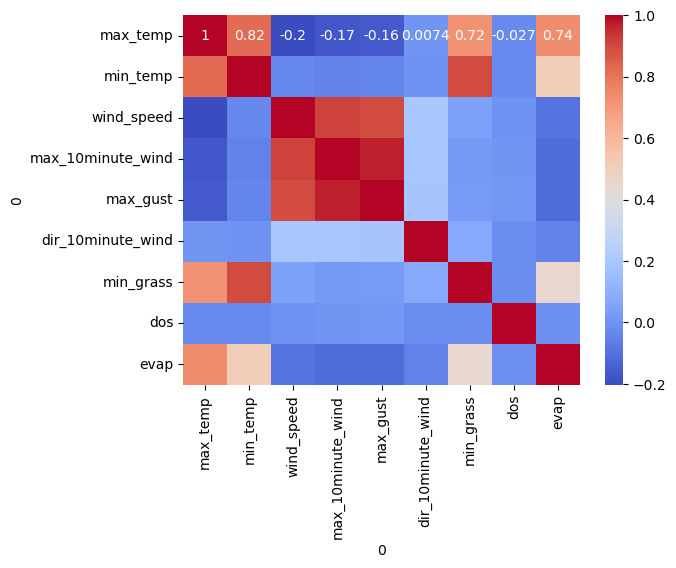

In [99]:
#check correlation
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [100]:
#creating pivot format for Tableau
long_data = df.melt(
    id_vars=['date'],
    value_vars=['max_temp', 'min_temp', 'rain'],
    var_name='metric',
    value_name='value'
)

In [101]:
long_data.head()

,date,metric,value
0,1979-10-28,max_temp,12.0
1,1979-10-29,max_temp,11.0
2,1979-10-30,max_temp,15.7
3,1979-10-31,max_temp,12.6
4,1979-11-01,max_temp,11.4


In [102]:
#validate dataset completeness
complete_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = set(complete_dates) - set(df['date'])
print("Missing dates:", missing_dates)

Missing dates: set()


In [103]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [104]:
print(df['sun'].describe())
print(df['sun'].unique())

count    16441.000000
mean         3.978408
std          3.728972
min          0.000000
25%          0.500000
50%          3.200000
75%          6.500000
max         15.900000
Name: sun, dtype: float64
[ 4.2  0.4  0.6  6.7  7.   0.2  1.8  0.   3.7  6.2  6.5  0.7  8.1  1.6
  4.7  7.4  7.2  3.8  1.2  2.9  1.7  2.8  2.2  4.5  3.5  1.1  3.1  2.4
  3.   0.5  1.3  5.5  0.1  1.   6.4  3.6  3.2  5.6  5.4  4.   6.1  0.9
  2.5  1.9  0.3  6.8  3.4  6.9  5.7  5.2  4.1  0.8  7.1  5.3  4.8  9.2
  4.3  1.4  2.   3.3  8.2  9.6  9.3  9.   2.6 11.3 11.8 11.4 11.5  3.9
  7.5  9.7 10.6 11.7  6.   5.8  6.3 12.1  8.   9.9 10.5  5.9  4.6 10.3
 14.3 14.7 14.9  4.9 13.   5.   8.5  2.7 11.2 10.8  4.4  8.8  8.9 10.4
  2.3  7.6  8.6 10.   2.1  9.1  9.4 12.9  8.3  6.6  7.9  7.7  1.5  5.1
  7.8 11.9 12.2 12.7 12.  13.3 12.8  9.5  8.7  7.3 10.2 14.6 11.1 13.5
  8.4 12.3 11.6 10.9 13.2 15.4 15.1 13.7 14.8 12.4 12.5  9.8 10.7 12.6
 14.  13.8 11.  14.2 10.1 13.4 15.3 15.5 13.9 13.1 15.  14.4 15.9 14.5
 15.7 15.2 13.6 1

In [105]:
#Binning for better aggregation
# Binning to include negative values and the full range
bins = [-float('inf'), -0.5, 0, 1, 2, 3, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Apply pd.cut
df['sun_category'] = pd.cut(df['sun'], bins=bins, labels=labels, right=False)

In [106]:
df.describe()

,date,max_temp,min_temp,min_grass,rain,wind_speed,max_10minute_wind,dir_10minute_wind,max_gust,sun,...,Longitude,year,month,day,temp_range,smd_combined,extreme_rain,heatwave,high_wind,extreme_weather
count,16441,1.644100e+04,1.644100e+04,1.643600e+04,16441.000000,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,16441.000000,...,1.644100e+04,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000
mean,2002-04-30 00:00:00,5.272563e-17,-5.164519e-17,-1.405004e-17,1.425522,1.577447e-17,-1.555838e-16,1.274923e-16,2.524996e-16,3.978408,...,-6.241000e+00,2001.827444,6.523569,15.733593,7.231470,2.545708,0.258561,0.987774,0.999635,0.255946
min,1979-10-28 00:00:00,-3.680376e+00,-4.126526e+00,-3.255875e+00,0.000000,-2.195593e+00,-2.406223e+00,-2.378281e+00,-2.355539e+00,0.000000,...,-6.241000e+00,1979.000000,1.000000,1.000000,0.700000,-2.300000,0.000000,0.000000,0.000000,0.000000
25%,1991-01-28 00:00:00,-7.235787e-01,-7.472534e-01,-7.517588e-01,0.000000,-7.624202e-01,-7.227221e-01,-7.436475e-01,-7.052126e-01,0.500000,...,-6.241000e+00,1991.000000,4.000000,8.000000,5.200000,-0.750000,0.000000,1.000000,1.000000,0.000000
50%,2002-04-30 00:00:00,-3.026074e-02,1.871504e-02,3.800100e-02,0.200000,-1.578006e-01,-1.105401e-01,3.071884e-01,-8.634039e-02,3.200000,...,-6.241000e+00,2002.000000,7.000000,16.000000,7.100000,3.566667,0.000000,1.000000,1.000000,0.000000
75%,2013-07-31 00:00:00,7.854075e-01,7.621550e-01,7.507111e-01,2.300000,6.035722e-01,6.546874e-01,7.742265e-01,6.356772e-01,6.500000,...,-6.241000e+00,2013.000000,10.000000,23.000000,9.000000,5.750000,1.000000,1.000000,1.000000,1.000000
max,2024-10-31 00:00:00,3.212020e+00,2.767190e+00,2.638430e+00,5.750000,5.664462e+00,5.705189e+00,1.825062e+00,5.586655e+00,15.900000,...,-6.241000e+00,2024.000000,12.000000,31.000000,19.500000,5.750000,1.000000,1.000000,1.000000,1.000000
std,NaN,1.000030e+00,1.000030e+00,1.000030e+00,2.016079,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,3.728972,...,1.114698e-12,12.996840,3.448872,8.802182,2.825003,3.234195,0.437857,0.109895,0.019101,0.436405


In [107]:
df = df.round(2)

In [108]:
df['season'] = pd.to_datetime(df['date']).dt.month.map({
        1: 'Winter', 2: 'Winter', 3: 'Spring', 
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Autumn', 
        10: 'Autumn', 11: 'Autumn', 12: 'Winter'
    })

In [109]:
df['season'].value_counts("Winter")*100

season
Spring    25.180950
Summer    25.180950
Autumn    24.931574
Winter    24.706526
Name: proportion, dtype: float64

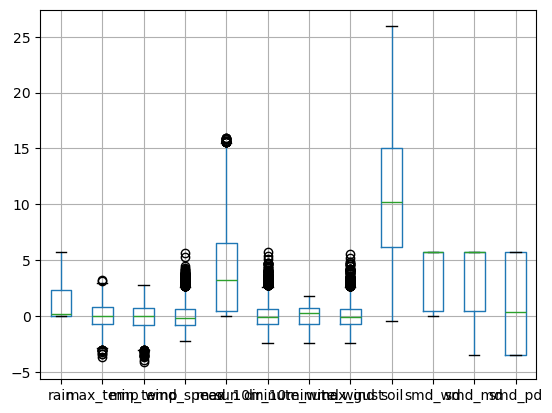

In [110]:
import matplotlib.pyplot as plt
df.boxplot(column=['rain', 'max_temp', 'min_temp', 'wind_speed', 'sun','max_10minute_wind', 'dir_10minute_wind','max_gust', 'soil', 'smd_wd', 'smd_md', 'smd_pd'])
plt.show()

In [111]:
print(df.columns)
print(df.shape)

Index(['date', 'max_temp', 'min_temp', 'igmin', 'min_grass', 'rain',
       'pressure_cbl', 'wind_speed', 'max_10minute_wind', 'dir_10minute_wind',
       'max_gust', 'sun', 'dos', 'global_radiation', 'soil', 'potential_evap',
       'evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'Station Name', 'year', 'month', 'day', 'temp_range', 'smd_combined',
       'wind_category', 'extreme_rain', 'heatwave', 'high_wind',
       'extreme_weather', 'extreme_weather_combination', 'sun_category',
       'season'],
      dtype='object', name=0)
(16441, 36)


In [112]:
df.to_csv("Mera_CleanData.csv", index=False)